In [1]:
    #Is there a significant difference in the median value of houses bounded by the Charles river or not?
    #Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
    #Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
    #What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
    
    #For all visualizations, please include a title in each graph and appropriate labels

    #Generate the following and explain your findings:
        #For the "Median value of owner-occupied homes" provide a boxplot
        #Provide a  histogram for the Charles river variable
        #Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
        #Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
        #Create a histogram for the pupil to teacher ratio variable
        
        
#Task 5: Use the appropriate tests to answer the questions provided.
#For each of the following questions;
#    Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#    Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#    Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#    What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#Be sure to:
#    State your hypothesis.
#    Use α = 0.05
#    Perform the test Statistics.
#    State the conclusion from the test.



In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats
#from math import sqrt

In [57]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
#boston_df.columns

In [5]:
#boston_df.info()

In [6]:
#boston_df.head()

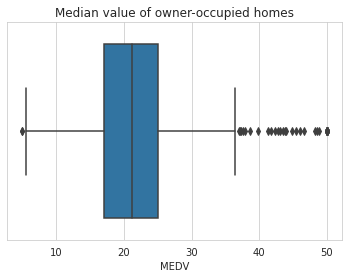

In [58]:
sns.set_style('whitegrid')
ax = sns.boxplot(x=boston_df['MEDV']).set_title('Median value of owner-occupied homes')

Given α = 0.05

## Q1: value of houses whether bounded by the river 

State the hypothesis
-   $H_0: µ_1 = µ_2$ ("there is no difference in values between houses by the river and not")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in values between houses by the river and not")


In [7]:
#(optional) Levene's Test to check test significance:
#scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')
#p-value is less than 0.05 so assumption of variance homogeneity is violated

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

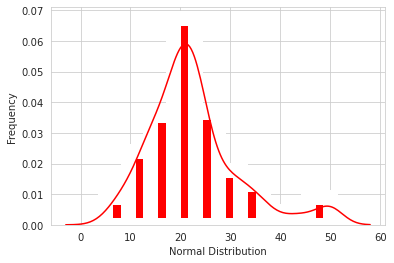

In [59]:
#ax = sns.distplot(boston_df['MEDV'],bins=10,kde=True,color='red',hist_kws={"linewidth": 15,'alpha':1})
#ax.set(xlabel='Normal Distribution', ylabel='Frequency')

For the sake of this exercise we assume it is normal

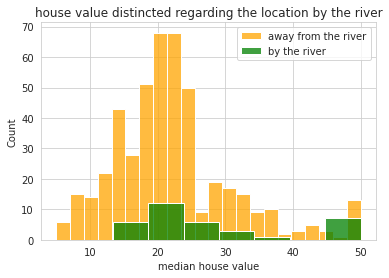

In [68]:
sns.histplot(data= boston_df[boston_df['CHAS'] == 0]['MEDV'], color='orange', kde=False).set_title('house value distincted regarding the location by the river')
sns.histplot(boston_df[boston_df['CHAS'] == 1]['MEDV'], color='green', kde=False) #by the river
plt.xlabel('median house value')
plt.legend(labels=['away from the river','by the river'])

Text(0.5, 0, 'position regarding the river')

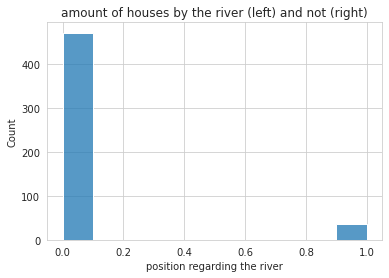

In [71]:

sns.histplot(data= boston_df['CHAS']).set_title('amount of houses by the river (left) and not (right)')
plt.xlabel('position regarding the river')

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance **(VIOLATED)**

Nevertheless performing t-test:

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value based on location regarding the river

## Q2: values of houses for each proportion of owner occupied units built prior to 1940

Categories:
- 35 years and younger
- between 35 and 70 years
- 70 years and older

State the hypothesis
-   $H_0: µ_1 = µ_2 = µ_3$ (all population means are equal)
-   $H_1:$ At least one of the means differ

In [73]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35-'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35-70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70+'

youngish = boston_df[boston_df['age_group'] == '35-']['MEDV']
middlish = boston_df[boston_df['age_group'] == '35-70']['MEDV']
oldish = boston_df[boston_df['age_group'] == '70+']['MEDV']

Text(0.5, 1.0, 'house value over age group')

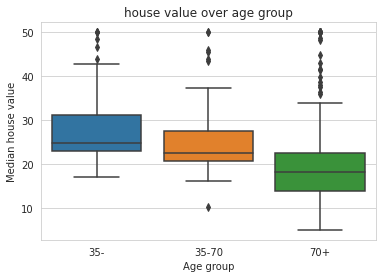

In [75]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, order=['35-','35-70','70+'])
plt.xlabel('Age group')
plt.ylabel('Median house value')
plt.title('house value over age group')


In [13]:
f_statistic, p_value = scipy.stats.f_oneway(youngish, middlish, oldish)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is significant evidence that at least one of the means differ

## Q3: correlation between non-retail business and nitric oxide

State the hypothesis:

-   $H_0:$ Nitric oxide concentration is not correlated with proportion of non-retail business acres per town
-   $H_1:$ Nitric oxide concentration is correlated with proportion of non-retail business acres per town

Text(0.5, 1.0, 'correlation of nitric oxide over industrial property concentrations')

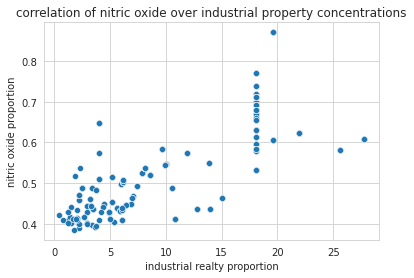

In [76]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.xlabel('industrial realty proportion')
plt.ylabel('nitric oxide proportion')
plt.title('correlation of nitric oxide over industrial property concentrations')

In [15]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion:** Since the p-value < 0.05, we reject  the null hypothesis and conclude that there  exists a relationship between proportion of non-retail business acres per town and nitric oxide concentration 

## Q4:  impact of distance to the employment centres on median value of owner occupied homes

State the hypothesis

-   $H_0: β1$ = 0 the said distance has no effect on median value of the homes
-   $H_1: β1$ ≠ 0 the said distance has an effect on median value of the homes

In [16]:
boston_df['DIS'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

In [17]:
X = boston_df['MEDV']
y = boston_df['DIS']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 13 Aug 2021   Prob (F-statistic):           1.21e-08
Time:                        11:05:05   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between the said distances and median value of owner occupied homes

Text(0.5, 0, 'pupil-teacher ratio')

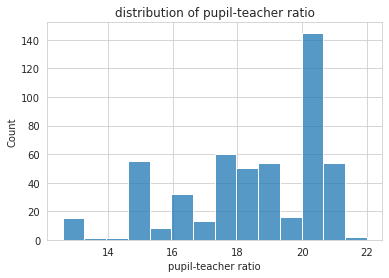

In [77]:
sns.histplot(data= boston_df['PTRATIO']).set_title('distribution of pupil-teacher ratio')
plt.xlabel('pupil-teacher ratio')